### Wasserstein Deep Conditional Generative Adversarial Network (with Gradient Penalty) (WDCGAN-GP) Regressor

## usage

Metal device set to: Apple M1


2022-10-30 11:10:51.779720: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-30 11:10:51.779945: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/var/folders/x2/4k1n7c3d5zx3_5sp7x24yzzw0000gn/T/ipykernel_17013/2070979678.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["horsepower"] = cleaned["horsepower"].astype("float")


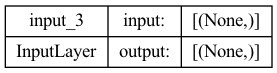

In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from bpyutils.util._dict import AutoDict
import numpy as np
import pandas as pd
import deeply
from tensorflow.keras.losses import BinaryCrossentropy

auto_mpg = pd.read_csv("./auto-mpg.csv")
cleaned  = auto_mpg.dropna()
cleaned  = auto_mpg[ ~auto_mpg["horsepower"].str.contains("\?") ]
cleaned["horsepower"] = cleaned["horsepower"].astype("float")
X, y = cleaned['horsepower'].values, cleaned['mpg'].values

n_feat = 1
n_out  = 1

scaler = AutoDict(MinMaxScaler)
X_norm = scaler["X"].fit_transform(X.reshape(-1, 1))
y_norm = scaler["y"].fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm)

input_shape = n_feat

def decoder_loss(y_true, y_pred):
    print(y_true, y_pred)

model = deeply.hub("gan", input_shape = input_shape, n_out = n_out,
                   decoder_loss = decoder_loss)
model.plot()

## example

In [2]:
from deeply.plots import history as history_plot
from deeply.metrics import r2_score
from tqdm.auto import trange

config = { "epochs": 100, "batch_size": 3 }

history = model.fit(X_train, y_train,
                     batch_size = config["batch_size"],
                     epochs = config["epochs"],
                     validation_split = 0.2)

y_pred = model.predict(X_test)
print("R2 Score: %s" % r2_score(y_test, y_pred).numpy())

history_plot(history)

bpyutils | 2022-10-30 11:10:58,631 | INFO | Monitoring val_loss...


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2022-10-30 11:10:59.367762: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Tensor("gan-discriminator/dense_block_1/activation_batch_norm_dropout_1/leaky_re_lu/LeakyRelu_3:0", shape=(3, 64), dtype=float32)
Tensor("ones_like_3:0", shape=(3, 64), dtype=float32)
Tensor("zeros_3:0", shape=(3, 1), dtype=float32) Tensor("gan-discriminator/dense_block_1/activation_batch_norm_dropout_1/leaky_re_lu/LeakyRelu_3:0", shape=(3, 64), dtype=float32)


TypeError: in user code:

    File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/achillesrasquinha/dev/deeply/src/deeply/model/gan.py", line 199, in train_step
        generator_gradients = generator_tape.gradient(loss_generator, self.generator.trainable_variables)

    TypeError: Argument `target` should be a list or nested structure of Tensors, Variables or CompositeTensors to be differentiated, but received None.
